In [23]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import sys
from tpr.models.fmri_module import fMRIModule

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialize model

In [20]:
mod = fMRIModule(checkpoint="facebook/opt-30b")
# mod = fMRIModule(checkpoint="decapoda-research/llama-30b-hf")

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

### Get embedding for example texts

In [21]:
texts = ['the man walked the dog', 'the dog walked the man']
embs = mod._get_embs(texts)
print('embeddings shape:', embs.shape)

100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

embeddings shape: (2, 7168)


### Initialize fMRI mappings for a subject

In [32]:
# initialize a single voxel for a single subject
subject = 'UTS03'  # human subject id
mod._init_fmri(subject)
mod._init_fmri_voxel(subject)

initializing fmri...


Text(0.5, 0, 'predicted correlation for top voxels')

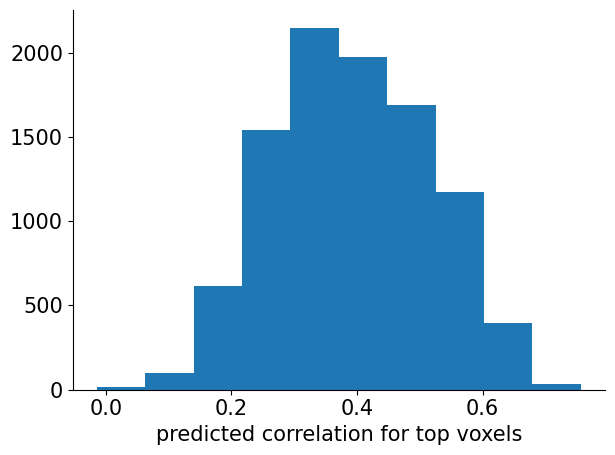

In [ ]:
# fMRI metadata
plt.hist(mod.corrs[mod.voxel_idxs])
plt.xlabel('predicted correlation for diverse set of top voxels')
plt.show()

### Get fMRI output predictions

In [25]:
texts = ['the man walked the dog', 'the dog walked the man']
embs_fmri = mod(texts, subject)
print('embeddings shape:', embs_fmri.shape)  # num_texts x num_output_voxels

100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

embeddings shape: (2, 9688)
